# `Product-Sales-Forecasting `

**Problem Statement:**
 In the competitive retail industry, the ability to predict future sales accurately is crucial for operational and strategic planning. Product sales forecasting aims to estimate the number of products a store will sell in the future, based on various influencing factors such as store type, location, regional characteristics, promotional activities, and temporal variations (such as holidays and seasons). This project focuses on developing a predictive model that uses historical sales data from different stores to forecast sales for upcoming periods.

**Data description**

ID: Unique identifier for each record in the dataset.

Store_id: Unique identifier for each store.

Store_Type: Categorization of the store based on its type.

Location_Type: Classification of the store's location (e.g., urban, suburban).

Region_Code: Code representing the geographical region where the store is located.

Date: The specific date on which the data was recorded.

Holiday: Indicator of whether the date was a holiday (1: Yes, 0: No).

Discount: Indicates whether a discount was offered on the given date (Yes/No).

 #Order: The number of orders received by the store on the specified day.

Sales: Total sales amount for the store on the given day.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv("/content/TRAIN.csv")

In [ ]:
train_df1=pd.read_csv("/content/TRAIN.csv")

In [ ]:
train_df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
train_df.shape

(188340, 10)

In [ ]:
print("Rows: ,",train_df.shape[0],"Columns: ",train_df.shape[1])

Rows: , 188340 Columns:  10


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
train_df["Date"]=pd.to_datetime(train_df["Date"])

In [ ]:
cat_cols= ['Store_Type', 'Location_Type', 'Region_Code', 'Discount']
for col in cat_cols:
 train_df[col] = train_df[col].astype('object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [ ]:
train_df.describe()

,Store_id,Date,Holiday,#Order,Sales
count,188340.000000,188340,188340.000000,188340.000000,188340.000000
mean,183.000000,2018-09-15 12:00:00.000000256,0.131783,68.205692,42784.327982
min,1.000000,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,92.000000,2018-05-09 18:00:00,0.000000,48.000000,30426.000000
50%,183.000000,2018-09-15 12:00:00,0.000000,63.000000,39678.000000
75%,274.000000,2019-01-22 06:00:00,0.000000,82.000000,51909.000000
max,365.000000,2019-05-31 00:00:00,1.000000,371.000000,247215.000000
std,105.366308,NaN,0.338256,30.467415,18456.708302


Missing Values

In [ ]:
train_df.isnull().sum()/train_df.shape[0]*100

,0
ID,0.0
Store_id,0.0
Store_Type,0.0
Location_Type,0.0
Region_Code,0.0
Date,0.0
Holiday,0.0
Discount,0.0
#Order,0.0
Sales,0.0


There are no missing values in the data.

In [ ]:
train_df.describe(include="all")

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
count,188340,188340.000000,188340,188340,188340,188340,188340.000000,188340,188340.000000,188340.000000
unique,188340,NaN,4,5,4,NaN,NaN,2,NaN,NaN
top,T1000001,NaN,S1,L1,R1,NaN,NaN,No,NaN,NaN
freq,1,NaN,88752,85140,63984,NaN,NaN,104051,NaN,NaN
mean,NaN,183.000000,NaN,NaN,NaN,2018-09-15 12:00:00.000000256,0.131783,NaN,68.205692,42784.327982
min,NaN,1.000000,NaN,NaN,NaN,2018-01-01 00:00:00,0.000000,NaN,0.000000,0.000000
25%,NaN,92.000000,NaN,NaN,NaN,2018-05-09 18:00:00,0.000000,NaN,48.000000,30426.000000
50%,NaN,183.000000,NaN,NaN,NaN,2018-09-15 12:00:00,0.000000,NaN,63.000000,39678.000000
75%,NaN,274.000000,NaN,NaN,NaN,2019-01-22 06:00:00,0.000000,NaN,82.000000,51909.000000
max,NaN,365.000000,NaN,NaN,NaN,2019-05-31 00:00:00,1.000000,NaN,371.000000,247215.000000


In [ ]:
categorical_summary = train_df[cat_cols].describe()
categorical_summary

,Store_Type,Location_Type,Region_Code,Discount
count,188340,188340,188340,188340
unique,4,5,4,2
top,S1,L1,R1,No
freq,88752,85140,63984,104051


In [ ]:
categorical_summary = train_df[cat_cols].nunique()
categorical_summary

,0
Store_Type,4
Location_Type,5
Region_Code,4
Discount,2


In [ ]:
#minimum datetime and maximum datetime
print("Starting Date: ",train_df['Date'].min(),",Last Date: ", train_df['Date'].max())

Starting Date:  2018-01-01 00:00:00 ,Last Date:  2019-05-31 00:00:00


In [ ]:
# number of unique values in each categorical columns
train_df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable      value        
Discount      No     104051
              Yes     84289
Location_Type L1      85140
              L2      48504
              L3      29928
              L4      10836
              L5      13932
Region_Code   R1      63984
              R2      54180
              R3      44376
              R4      25800
Store_Type    S1      88752
              S2      28896
              S3      24768
              S4      45924

Try establishing a relation between the
dependent and independent variable

(Dependent “Count” & Independent:
Location_Type,Region_Code,Store_Type,Discount)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


**Univariate Analysis:**

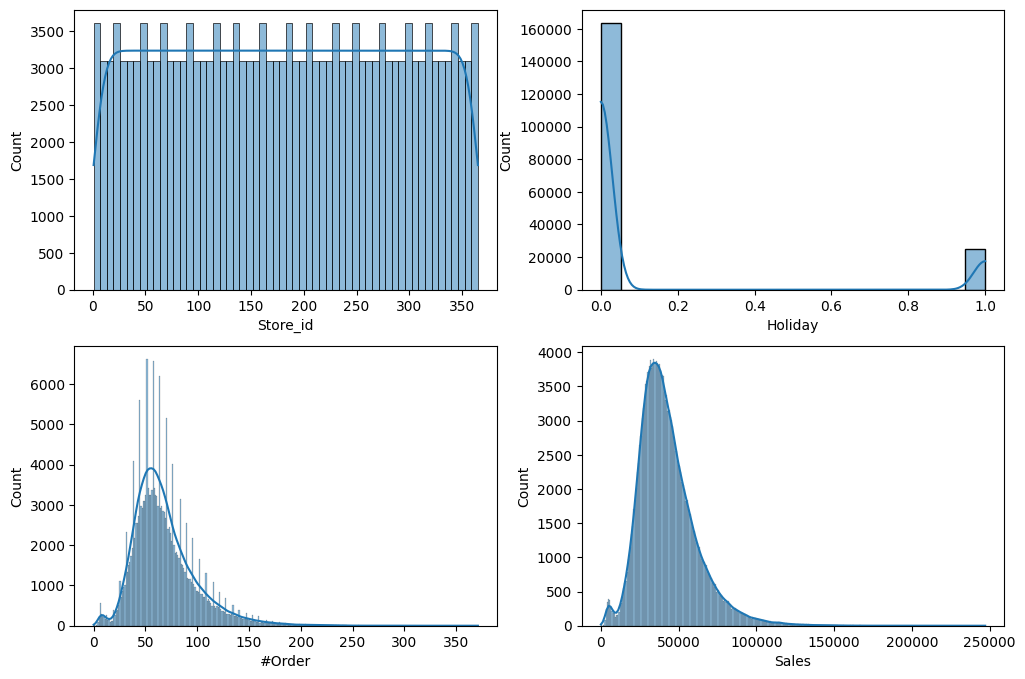

In [ ]:
#understanding the distribution for numerical variables
num_cols = ['Store_id','Holiday','#Order','Sales']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
index = 0
for row in range(2):
 for col in range(2):
  sns.histplot(train_df[num_cols[index]], ax=axis[row, col], kde=True)
  index += 1

plt.show()

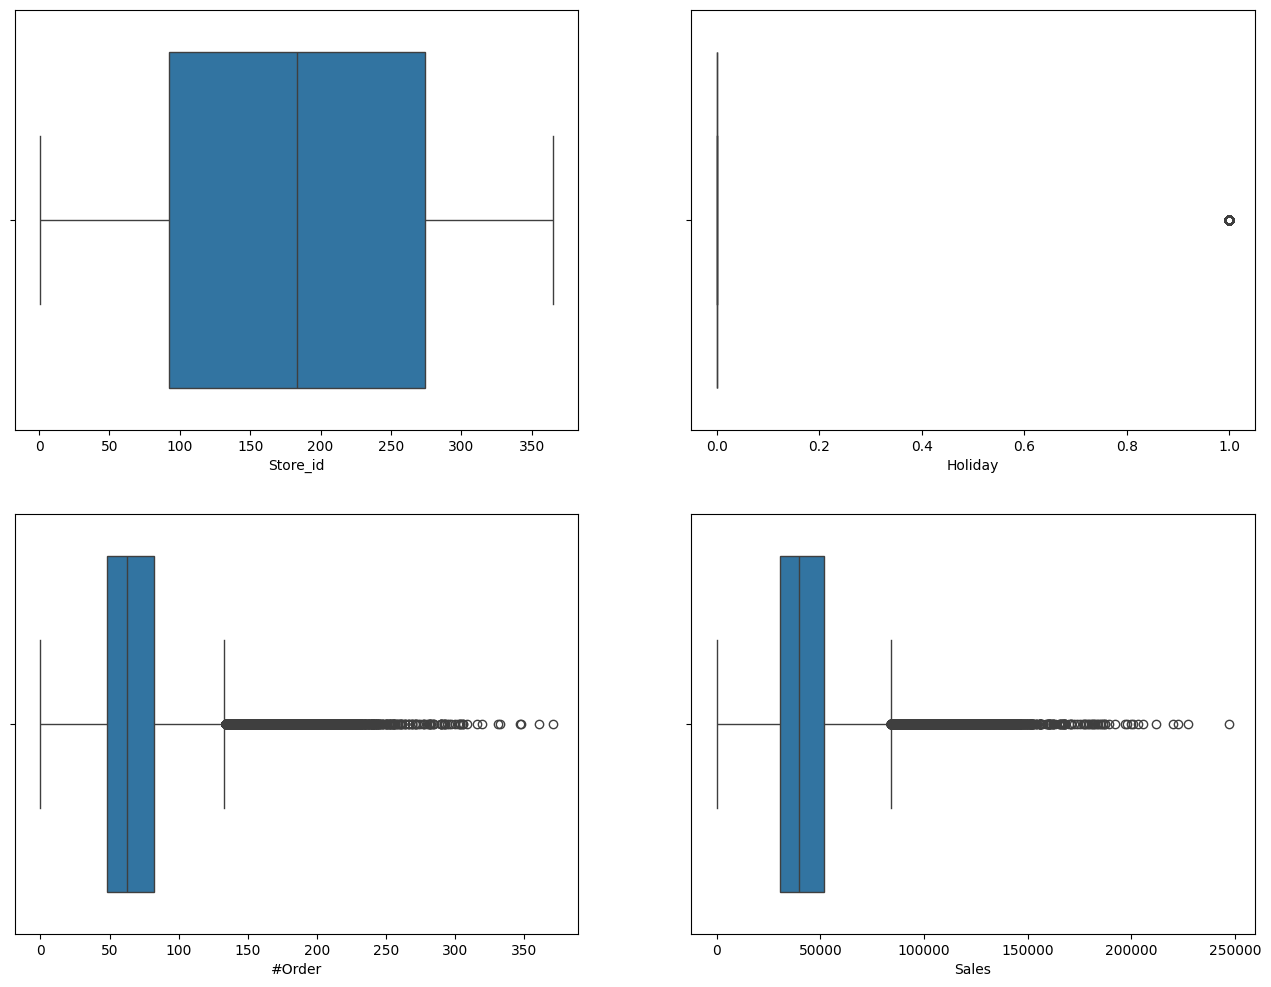

In [ ]:
#plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
 for col in range(2):
  sns.boxplot(x=train_df[num_cols[index]], ax=axis[row, col])
  index += 1

plt.show()


Looks like Orders and Sales more outliers








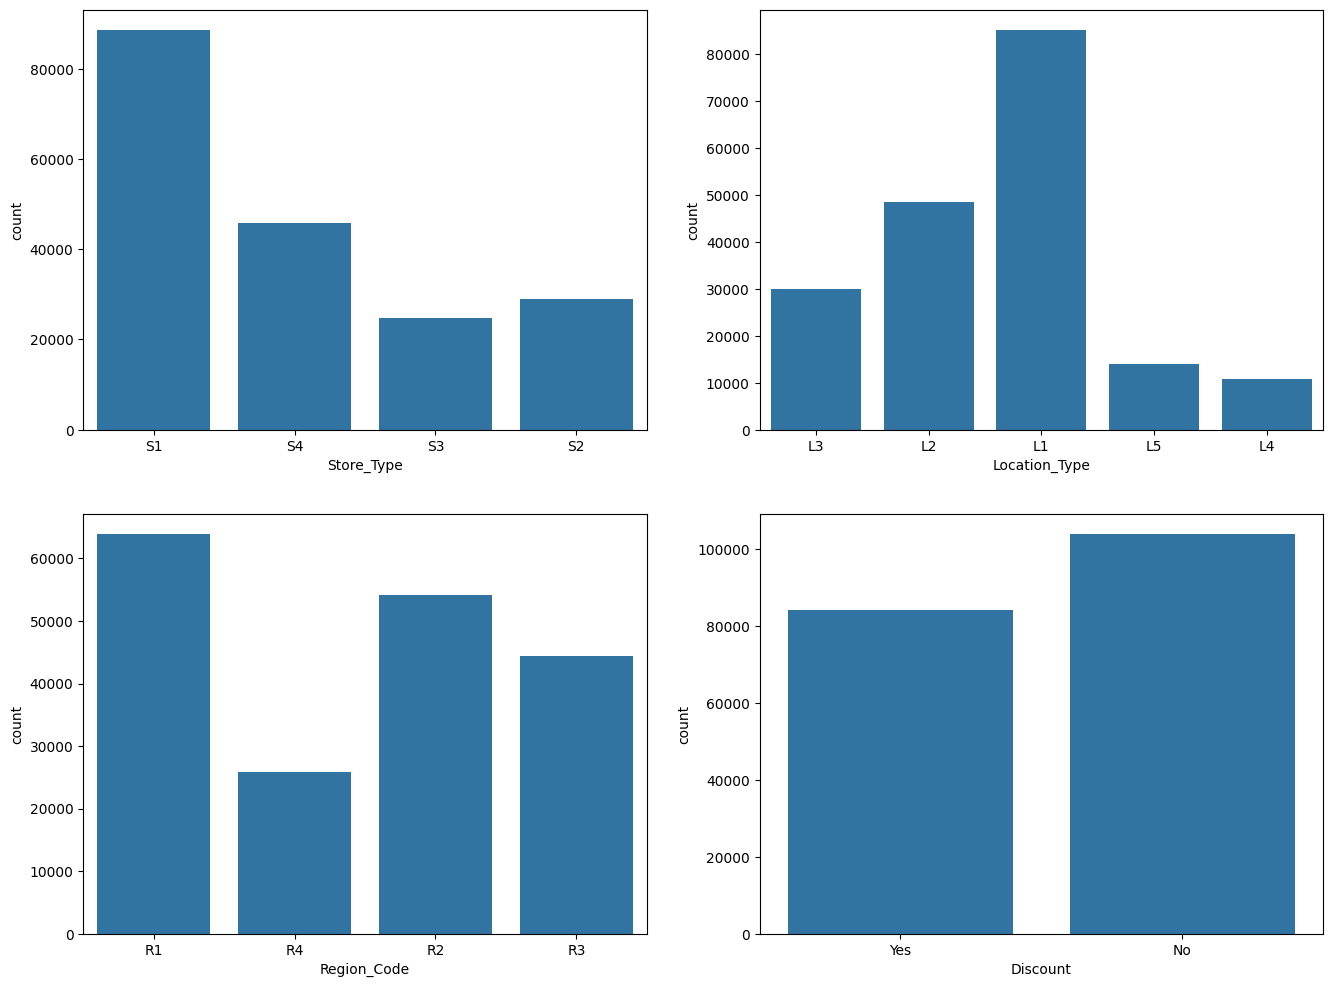

In [ ]:
#understanding the distribution for categorical variables
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16,12))
index = 0
for row in range(2):
 for col in range(2):
  sns.countplot(data=train_df, x=cat_cols[index], ax=axis[row, col])
  index += 1

plt.show()

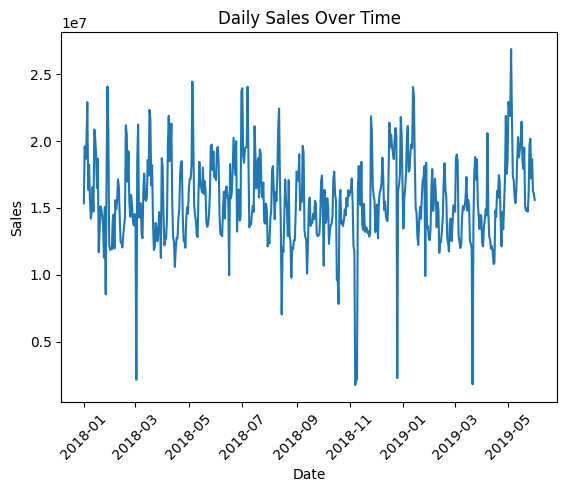

In [ ]:
daily_sales = train_df.groupby('Date')['Sales'].sum().reset_index()
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


The chart shows daily sales from January 2018 to May 2019, with sales fluctuating mostly between 1.0 and 2.0 million. There are periodic spikes, likely due to events or promotions, and several sharp drops to near-zero, which may indicate outages or data issues. The highest peaks occur around early 2019, suggesting significant sales events during that period.

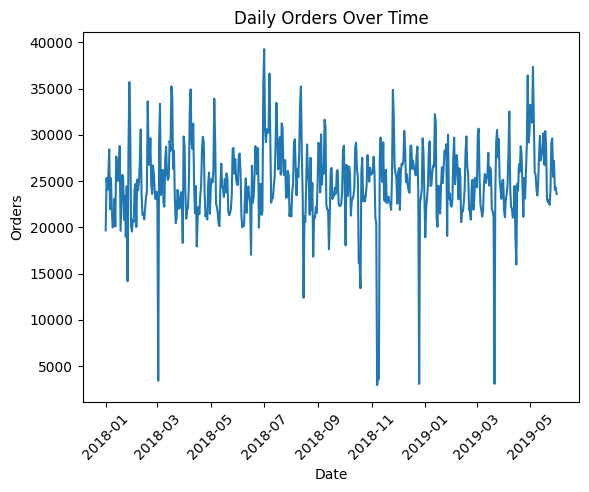

In [ ]:
daily_orders = train_df.groupby('Date')['#Order'].sum().reset_index()
plt.plot(daily_orders['Date'], daily_orders['#Order'])
plt.title('Daily Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.xticks(rotation=45)
plt.show()

The chart shows daily orders from January 2018 to May 2019, with most values fluctuating between 20,000 and 30,000. There are regular peaks, indicating higher-order days likely due to events or promotions, and several sharp dips to near-zero, possibly from system outages or data gaps. The highest order volumes occur intermittently, with a notable spike around mid-2018.

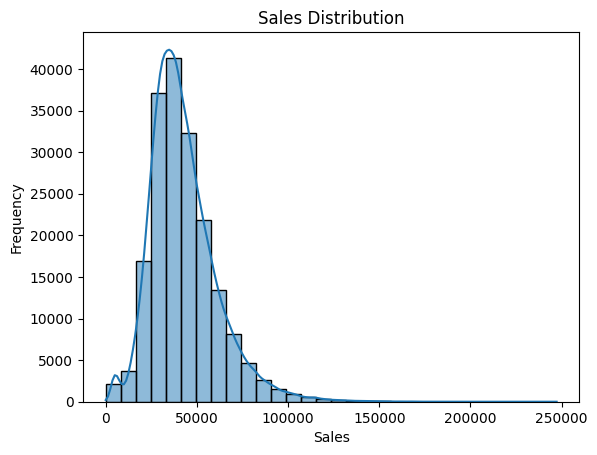

In [ ]:
# Histogram for Sales
sns.histplot(train_df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


Looks like sales follows Normal Distribution.

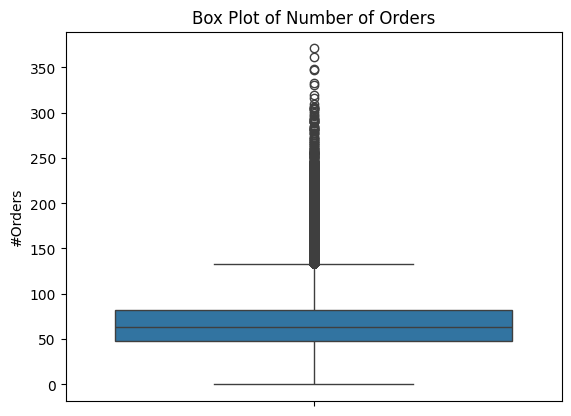

In [ ]:
# Box Plot for #Order
sns.boxplot(data=train_df, y='#Order')
plt.title('Box Plot of Number of Orders')
plt.ylabel('#Orders')
plt.show()

**Bivariate Analysis**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


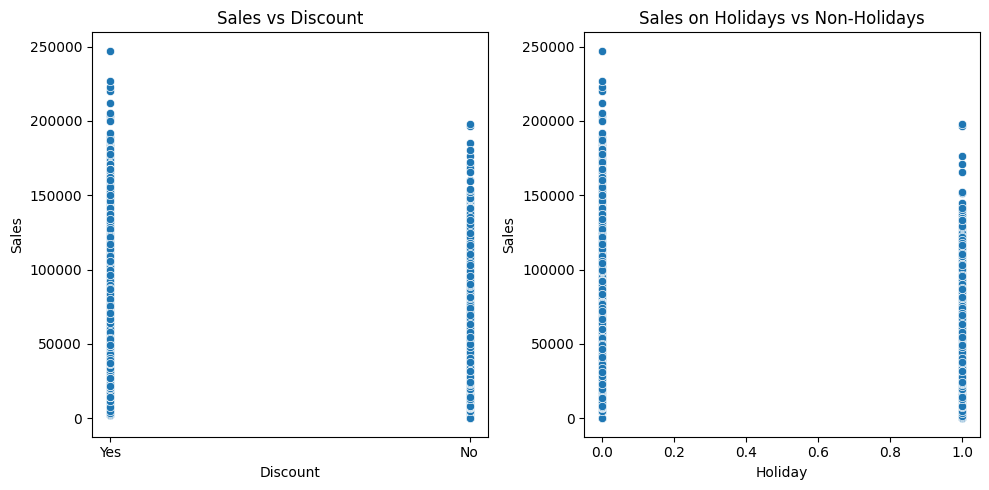

In [ ]:
# Scatter plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Discount', y='Sales', data=train_df)
plt.title('Sales vs Discount')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Holiday', y='Sales', data=train_df)
plt.title('Sales on Holidays vs Non-Holidays')

plt.tight_layout()
plt.show()

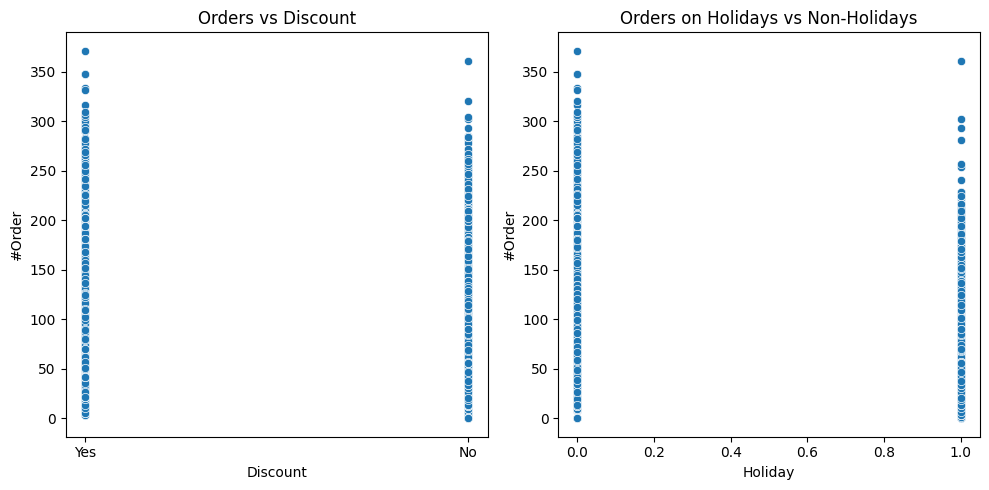

In [ ]:
# Scatter plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Discount', y='#Order', data=train_df)
plt.title('Orders vs Discount')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Holiday', y='#Order', data=train_df)
plt.title('Orders on Holidays vs Non-Holidays')

plt.tight_layout()
plt.show()

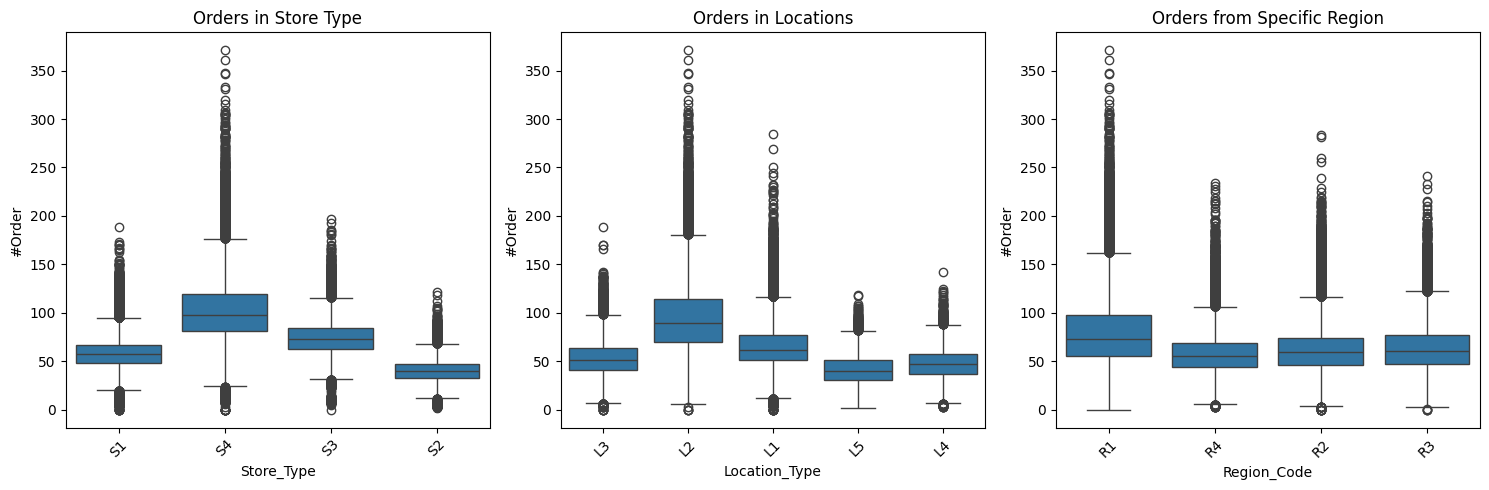

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Store_Type', y='#Order', data=train_df)
plt.title('Orders in Store Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Location_Type', y='#Order', data=train_df)
plt.title('Orders in Locations')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Region_Code', y='#Order', data=train_df)
plt.title('Orders from Specific Region')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

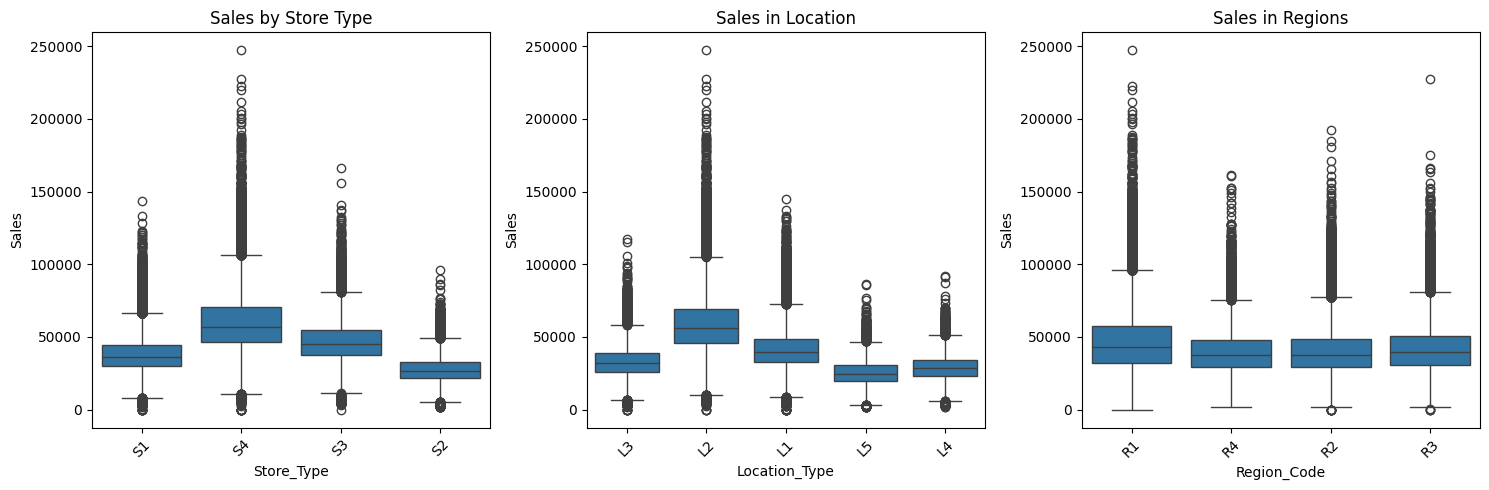

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Store_Type', y='Sales', data=train_df)
plt.title('Sales by Store Type')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Location_Type', y='Sales', data=train_df)
plt.title('Sales in Location')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Region_Code', y='Sales', data=train_df)
plt.title('Sales in Regions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

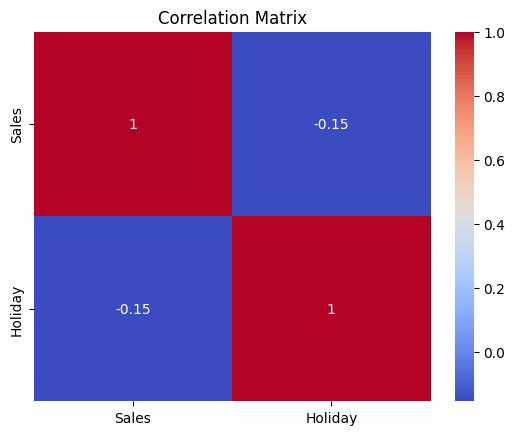

In [ ]:
# Correlation Matrix
correlation_matrix = train_df[['Sales','Holiday']].corr()  # Add other continuous or ordinal variables if available
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

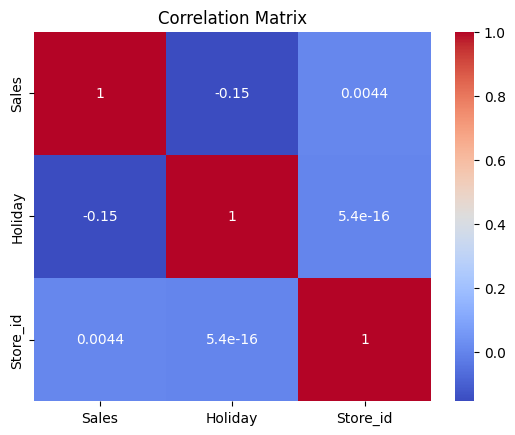

In [ ]:
# Correlation Matrix
correlation_matrix = train_df[['Sales','Holiday','Store_id']].corr()  # Add other continuous or ordinal variables if available
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

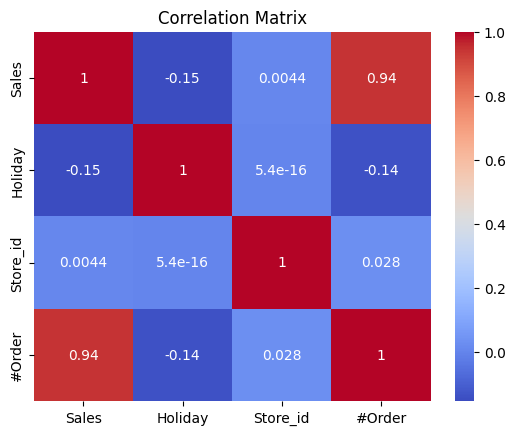

In [ ]:
# Correlation Matrix
correlation_matrix = train_df[['Sales','Holiday','Store_id','#Order']].corr()  # Add other continuous or ordinal variables if available
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

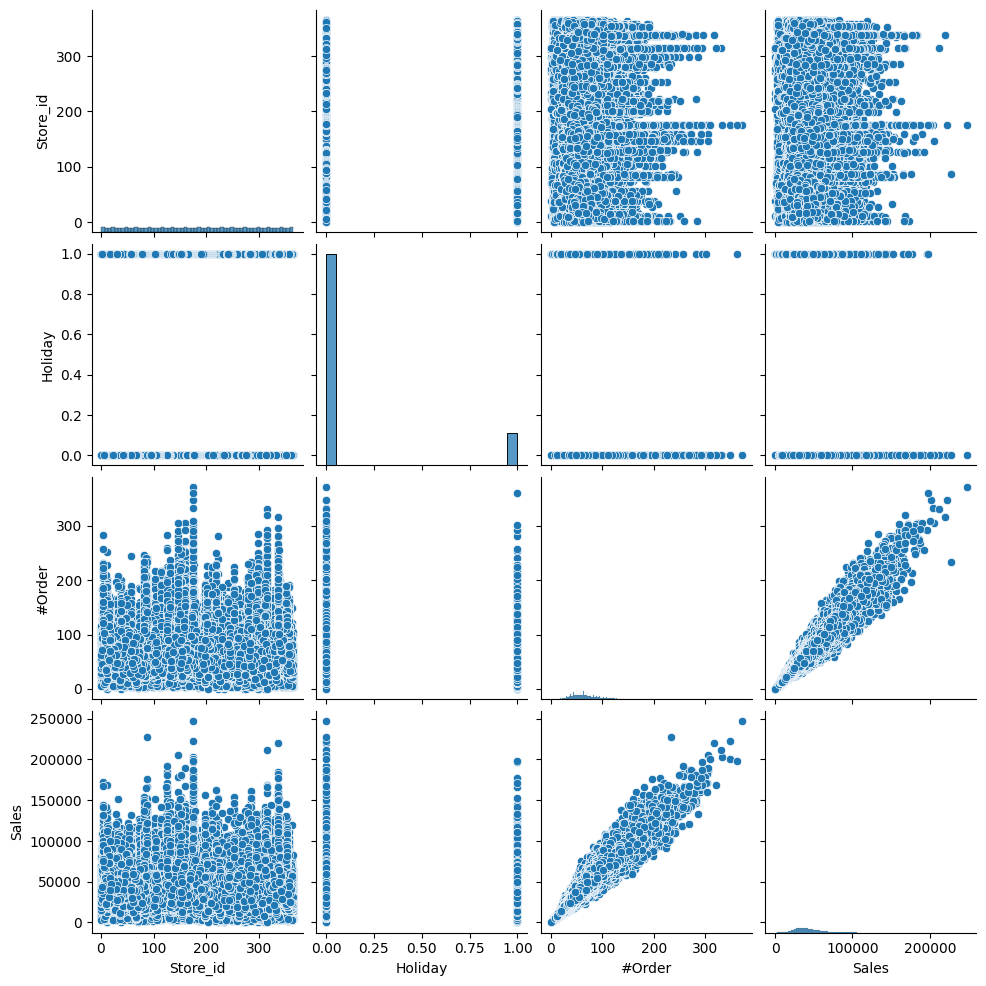

In [ ]:
 #Pairplots
sns.pairplot(data=train_df)

TIME SERIES ANALYSIS

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [ ]:
train_df = pd.get_dummies(train_df, columns=['Discount'], prefix='Discount')

In [ ]:
#daily_sales = train_df.groupby('Date').agg({'Sales': 'sum', 'Discount': 'sum', 'Holiday': 'max'}).reset_index()

In [ ]:
daily_sales = train_df.groupby('Date').agg({'Sales': 'sum', 'Discount_Yes': 'sum', 'Discount_No': 'sum', 'Holiday': 'max'}).reset_index()

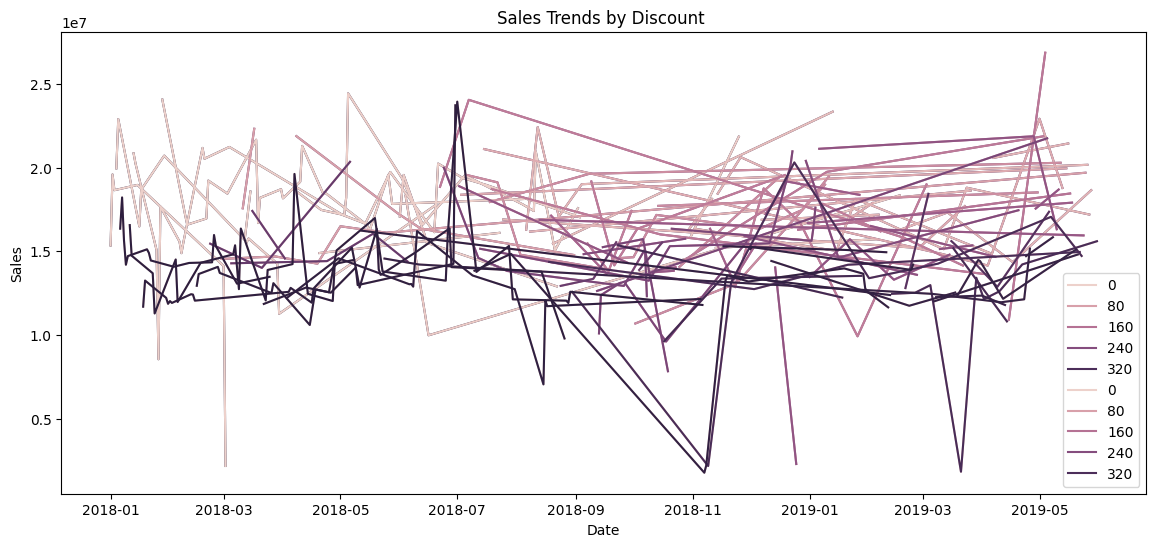

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales',hue='Discount_Yes')
sns.lineplot(data=daily_sales, x='Date', y='Sales', hue='Discount_No')
plt.title('Sales Trends by Discount ')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

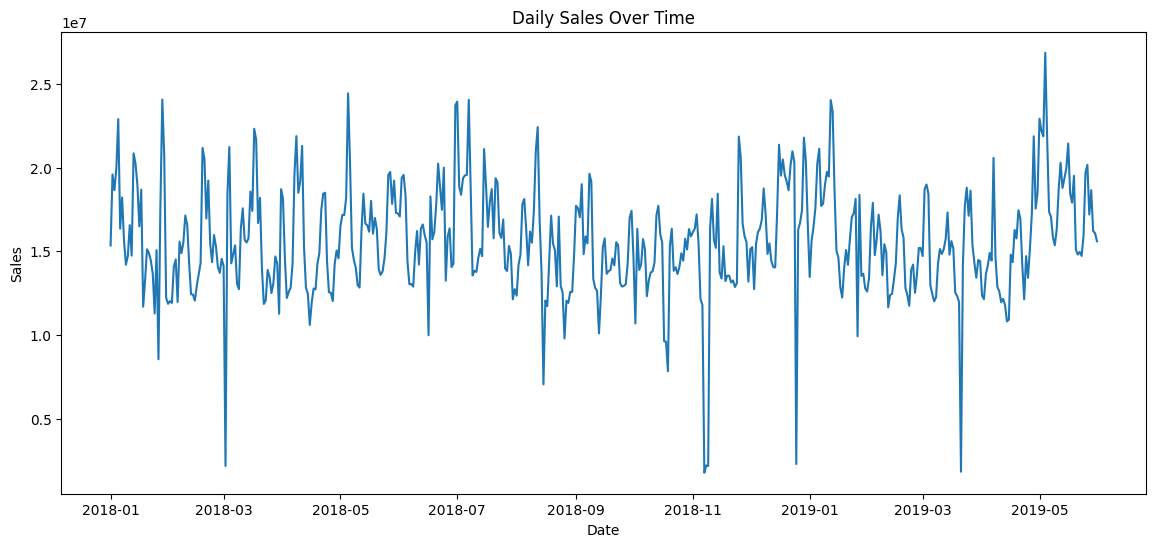

In [ ]:
# Plot sales over time
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

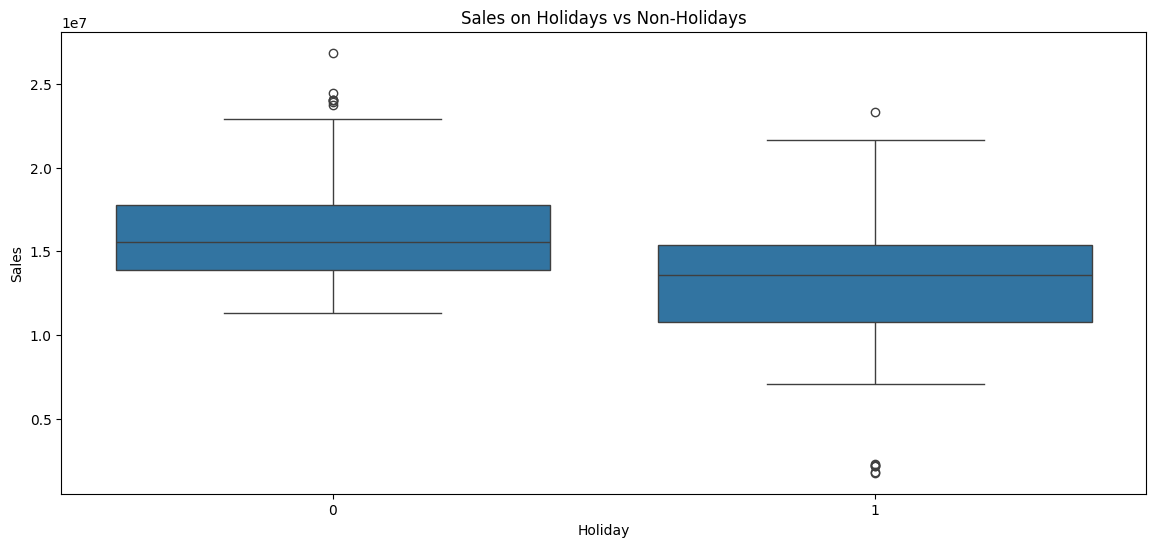

In [ ]:
# Analyze the effect of Holidays and Discounts
plt.figure(figsize=(14, 6))
sns.boxplot(x='Holiday', y='Sales', data=daily_sales)
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()

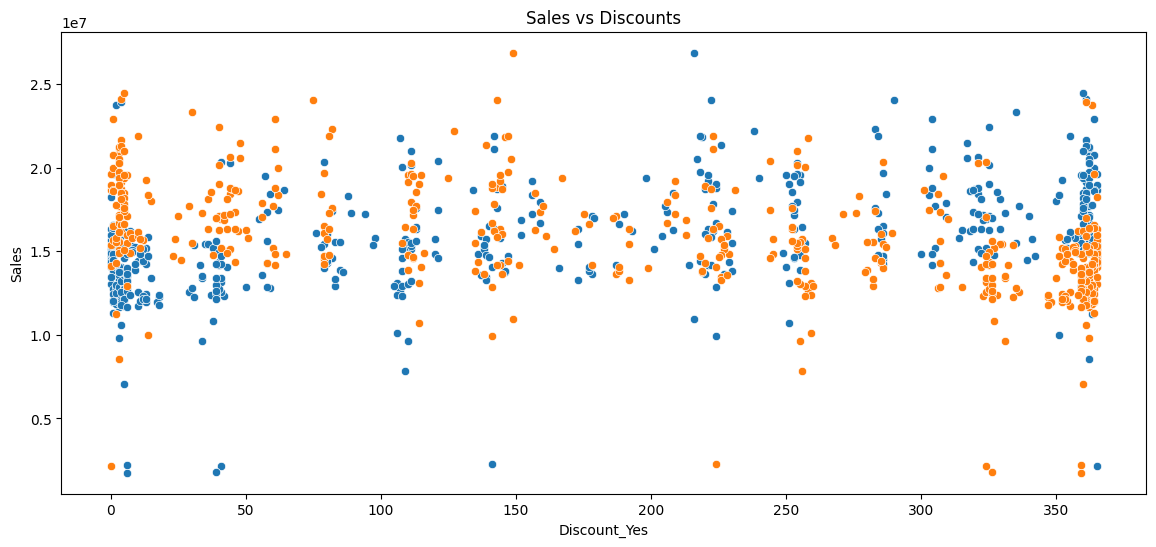

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Discount_Yes', y='Sales', data=daily_sales,)
sns.scatterplot(x='Discount_No', y='Sales', data=daily_sales)
plt.title('Sales vs Discounts')
plt.show()

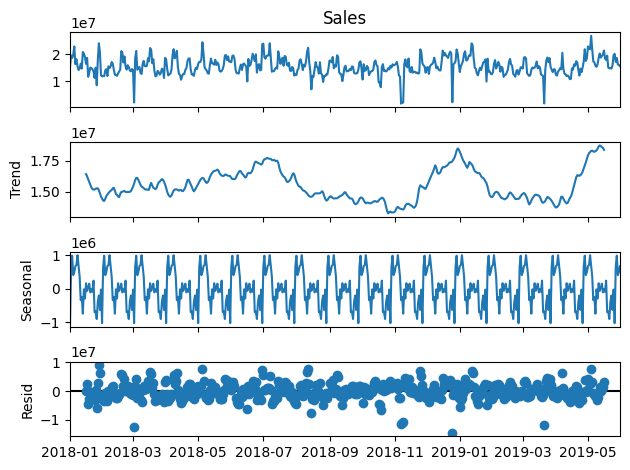

In [ ]:
# Decompose the series
daily_sales.set_index('Date', inplace=True)
result = seasonal_decompose(daily_sales['Sales'], model='additive', period=30)
result.plot()
plt.show()


In [ ]:
#Stationarity Check
# Perform Dickey-Fuller test
adf_test = adfuller(daily_sales['Sales'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
if adf_test[1] <= 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary")


ADF Statistic: -3.524207906563322
p-value: 0.007386718711362291
The series is stationary


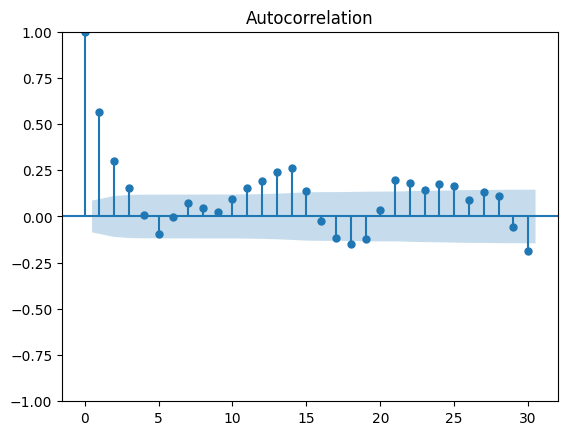

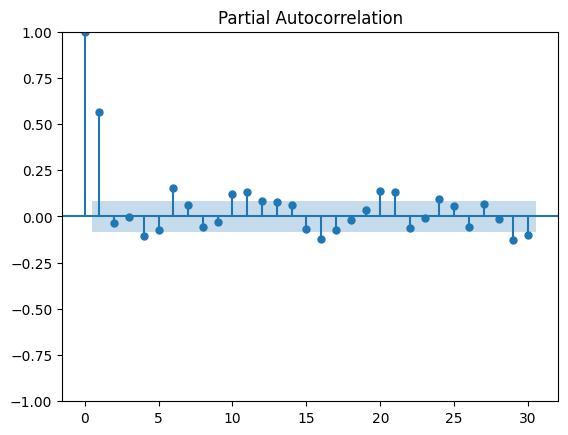

In [ ]:
# Step 5: Identify Cyclic Patterns with ACF/PACF
plot_acf(daily_sales['Sales'], lags=30)
plt.show()
plot_pacf(daily_sales['Sales'], lags=30)
plt.show()

In [ ]:
# Set ARIMA order (p, 0, q) based on ACF and PACF plots
model = ARIMA(daily_sales['Sales'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  516
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8371.401
Date:                Sun, 10 Nov 2024   AIC                          16750.802
Time:                        06:09:24   BIC                          16767.787
Sample:                    01-01-2018   HQIC                         16757.458
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.562e+07   2.71e+05     57.728      0.000    1.51e+07    1.61e+07
ar.L1          0.5255      0.053      9.881      0.000       0.421       0.630
ma.L1          0.0609      0.062      0.974      0.3

In [ ]:
# Step 7: Model Evaluation
# Forecasting and evaluating the model
forecast = model_fit.forecast(steps=30)
daily_sales['Forecast'] = np.nan
daily_sales['Forecast'].iloc[-30:] = forecast

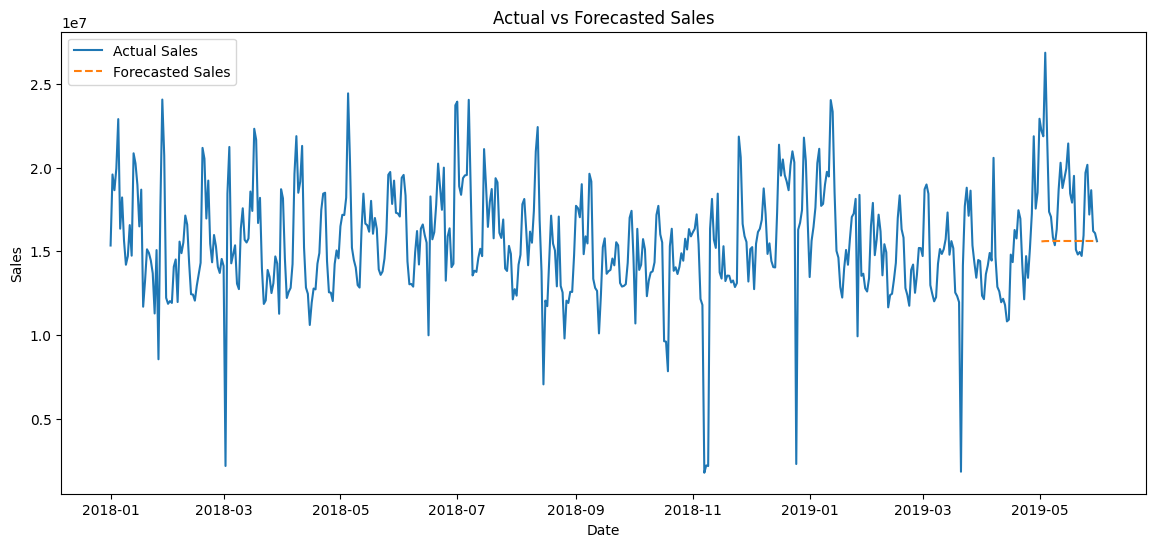

In [ ]:
# Plot actual vs forecasted values
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['Sales'], label='Actual Sales')
plt.plot(daily_sales['Forecast'], label='Forecasted Sales', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# Calculate error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(daily_sales['Sales'].iloc[-30:], daily_sales['Forecast'].iloc[-30:])
rmse = sqrt(mean_squared_error(daily_sales['Sales'].iloc[-30:], daily_sales['Forecast'].iloc[-30:]))
print(f'MAE: {mae}, RMSE: {rmse}')

MAE: 2868364.7031155904, RMSE: 3838016.56268884


Categorical Data Analysis:

In [ ]:
# Calculate total sales for each categorical variable
store_type_sales =train_df.groupby('Store_Type')['Sales'].sum().reset_index()
location_type_sales = train_df.groupby('Location_Type')['Sales'].sum().reset_index()
region_sales = train_df.groupby('Region_Code')['Sales'].sum().reset_index()

In [ ]:
print("Sales by Store Type:\n", store_type_sales)
print("\nSales by Location Type:\n", location_type_sales)
print("\nSales by Region:\n", region_sales)

Sales by Store Type:
   Store_Type         Sales
0         S1  3.343866e+09
1         S2  7.955308e+08
2         S3  1.165658e+09
3         S4  2.752946e+09

Sales by Location Type:
   Location_Type         Sales
0            L1  3.529359e+09
1            L2  2.872964e+09
2            L3  9.897865e+08
3            L4  3.149745e+08
4            L5  3.509163e+08

Sales by Region:
   Region_Code         Sales
0          R1  2.992243e+09
1          R2  2.170172e+09
2          R3  1.870205e+09
3          R4  1.025381e+09


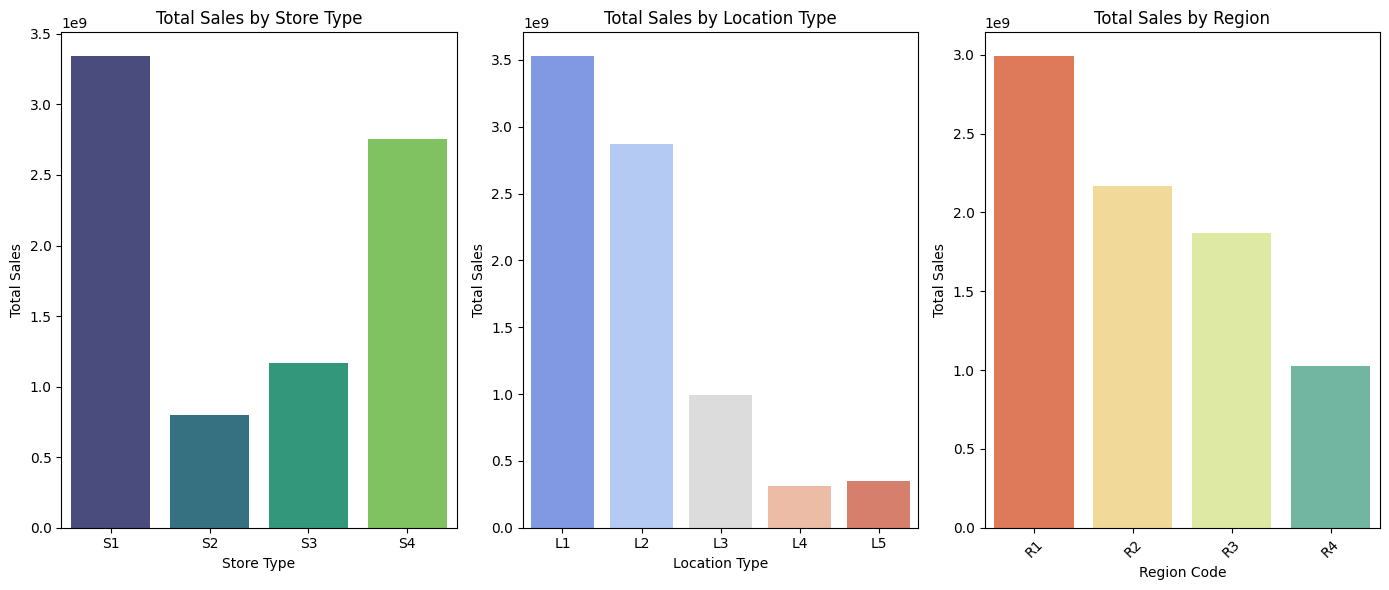

In [ ]:
plt.figure(figsize=(14, 6))

# Bar chart for Store Type
plt.subplot(1, 3, 1)
sns.barplot(data=store_type_sales, x='Store_Type', y='Sales', palette='viridis')
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')

# Bar chart for Location Type
plt.subplot(1, 3, 2)
sns.barplot(data=location_type_sales, x='Location_Type', y='Sales', palette='coolwarm')
plt.title('Total Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')

# Bar chart for Region Code
plt.subplot(1, 3, 3)
sns.barplot(data=region_sales, x='Region_Code', y='Sales', palette='Spectral')
plt.title('Total Sales by Region')
plt.xlabel('Region Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Missing Values

In [ ]:
# Check for missing values
missing_data = train_df.isnull().sum()
missing_percentage = (missing_data / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print("Missing Data Overview:\n", missing_info)

Missing Data Overview:
                Missing Values  Percentage
ID                          0         0.0
Store_id                    0         0.0
Store_Type                  0         0.0
Location_Type               0         0.0
Region_Code                 0         0.0
Date                        0         0.0
Holiday                     0         0.0
#Order                      0         0.0
Sales                       0         0.0
Discount_No                 0         0.0
Discount_Yes                0         0.0


There are no Missing Values in the Data

Outlier Detection

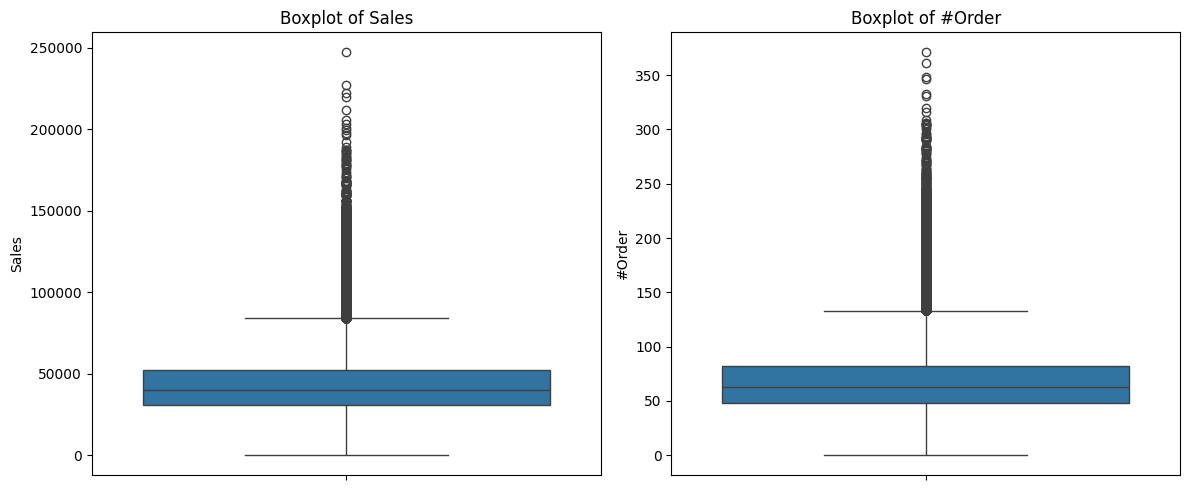

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numeric columns to visually detect outliers
numeric_cols = ['Sales', '#Order']  # Add more numeric columns if applicable
plt.figure(figsize=(12, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
#1. IQR Method
# Detecting outliers using the IQR method for 'Sales' and '#Order'
for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f'Number of outliers in {col}:', len(outliers))

    # Optionally, flag outliers in the DataFrame
    train_df[f'{col}_Outlier'] = ((train_df[col] < lower_bound) | (train_df[col] > upper_bound))


Number of outliers in Sales: 5843
Number of outliers in #Order: 7089


In [ ]:
#Z-Score Method
from scipy.stats import zscore

# Z-score method for 'Sales' and '#Order'
for col in numeric_cols:
    train_df[f'{col}_Zscore'] = zscore(train_df[col])
    outliers = train_df[(train_df[f'{col}_Zscore'] > 3) | (train_df[f'{col}_Zscore'] < -3)]
    print(f'Number of outliers in {col} using Z-score:', len(outliers))

    # Flag Z-score outliers
    train_df[f'{col}_Outlier_Z'] = ((train_df[f'{col}_Zscore'] > 3) | (train_df[f'{col}_Zscore'] < -3))


Number of outliers in Sales using Z-score: 2421
Number of outliers in #Order using Z-score: 2664


#Handling Outliers


Outliers can either be capped, transformed, or removed based on the nature of the data and analysis requirements.

Cap Outliers: Replace outliers with the nearest boundary (lower or upper bound).

In [ ]:
# Cap outliers based on IQR bounds
for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train_df[col] = np.where(train_df[col] < lower_bound, lower_bound, train_df[col])
    train_df[col] = np.where(train_df[col] > upper_bound, upper_bound, train_df[col])

Recheck Data Post-Outlier Handling

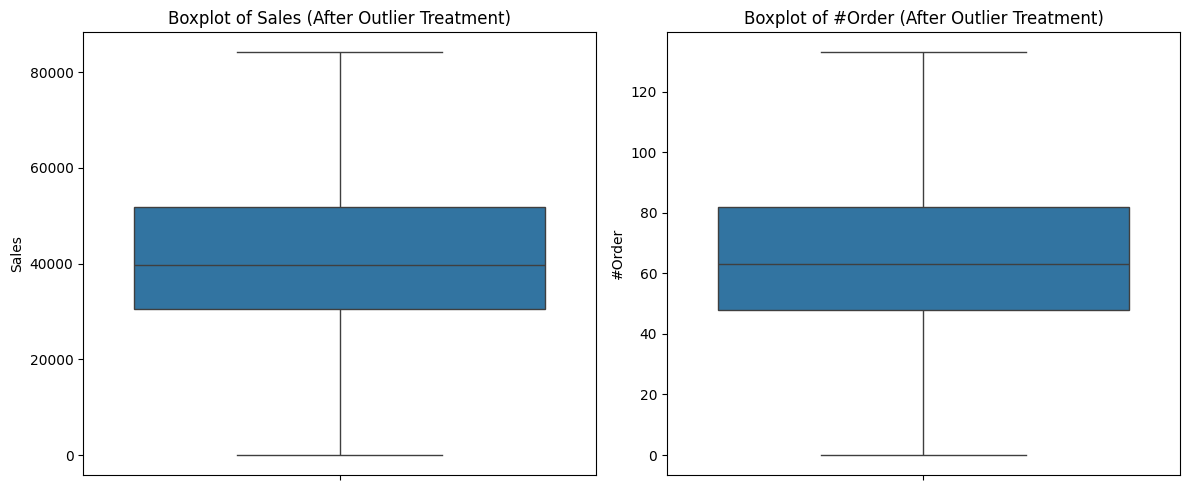

In [ ]:
# Boxplot to confirm outlier treatment
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col} (After Outlier Treatment)')

plt.tight_layout()
plt.show()


Now there are no outliers in the data.

**Hypothesis Testing**

1.Impact of Discounts on Sales:

●	Hypothesis: Stores offering discounts will have significantly higher sales than stores not offering discounts.

●	Test: Perform a t-test for the mean sales on days with discounts versus days without.


In [ ]:
from scipy.stats import ttest_ind

Null Hypothesis (H₀): There is no significant difference in mean sales on days with discounts compared to days without discounts.

Alternative Hypothesis (H₁): There is a significant difference in mean sales on days with discounts versus days without discounts.

In [ ]:
no_discount_sales = train_df[train_df['Discount_No']]['Sales']
discount_sales = train_df[train_df['Discount_Yes']  ]['Sales']

In [ ]:
#no_discount_sales1=no_discount_sales.mean()
#discount_sales1=discount_sales.mean()

In [ ]:
# Perform the two-sided t-test
t_stat, p_value = ttest_ind(discount_sales, no_discount_sales, equal_var=False)
print("Two-sample T-test results:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean sales on days with discounts versus days without discounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean sales on days with discounts versus days without discounts.")

Two-sample T-test results:
T-statistic: 153.96715405492105, P-value: 0.0
Reject the null hypothesis: There is a significant difference in mean sales on days with discounts versus days without discounts.


From this Hypothesis Testing we can clearly say that

There is a significant difference in sales on days with discounts versus days without discounts

In [ ]:
from scipy.stats import shapiro, levene
print("Normality test results (Shapiro-Wilk):")

Normality test results (Shapiro-Wilk):


In [ ]:
from scipy.stats import shapiro, levene

# Check for normality
print("Normality test results (Shapiro-Wilk):")
print("Discounted Sales Normality:", shapiro(discount_sales))
print("Non-discounted Sales Normality:", shapiro(no_discount_sales))

# Check for equal variances
stat, p = levene(discount_sales, no_discount_sales)
print(stat)
print("Levene’s test for equal variances:", p)

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean sales on days with discounts versus days without discounts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean sales on days with discounts versus days without discounts.")


Normality test results (Shapiro-Wilk):
Discounted Sales Normality: ShapiroResult(statistic=0.9721938206390829, pvalue=6.6905990436871e-77)
Non-discounted Sales Normality: ShapiroResult(statistic=0.956730109028638, pvalue=2.794900177865316e-91)
1409.2636587140528
Levene’s test for equal variances: 2.8201263875923275e-307
Reject the null hypothesis: There is a significant difference in mean sales on days with discounts versus days without discounts.


2.	Effect of Holidays on Sales:

●	Hypothesis: Sales on holidays are higher compared to non-holidays.

●	Test: Use a t-test or ANOVA to compare sales on holidays vs. regular days.


Null Hypothesis (H₀): There is no significant difference in mean sales between holidays and non-holidays.

Alternative Hypothesis (H₁): Sales on holidays are significantly higher than on non-holidays.

In [ ]:
holiday_sales=train_df[train_df['Holiday']==1]['Sales']
no_holiday_sales=train_df[train_df['Holiday']==0]['Sales']

In [ ]:
t_stat, p_value = ttest_ind(holiday_sales, no_holiday_sales, alternative='greater', equal_var=False)
print("One-sided T-test results:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

One-sided T-test results:
T-statistic: -68.19825369071343, P-value: 1.0


In [ ]:
t_stat, p_value = ttest_ind(holiday_sales, no_holiday_sales, alternative='less', equal_var=False)
print("One-sided T-test results:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

One-sided T-test results:
T-statistic: -68.19825369071343, P-value: 0.0


In [ ]:
t_stat, p_value = ttest_ind(holiday_sales, no_holiday_sales, equal_var=False)
print("One-sided T-test results:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

One-sided T-test results:
T-statistic: -68.19825369071343, P-value: 0.0


In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sales on holidays are significantly higher than on non-holidays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales on holidays versus non-holidays.")

Reject the null hypothesis: Sales on holidays are significantly higher than on non-holidays.


In [ ]:
from scipy.stats import shapiro, levene

# Check for normality
print("Normality test results (Shapiro-Wilk):")
print("Holiday Sales Normality:", shapiro(holiday_sales))
print("Non-Holiday Sales Normality:", shapiro(no_holiday_sales))

# Check for equal variances
stat, p = levene(holiday_sales, no_holiday_sales)
print("Levene’s test for equal variances:", p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Sales on holidays are significantly higher than on non-holidays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales on holidays versus non-holidays.")



Normality test results (Shapiro-Wilk):
Holiday Sales Normality: ShapiroResult(statistic=0.9730933688389298, pvalue=2.1166588593268902e-54)
Non-Holiday Sales Normality: ShapiroResult(statistic=0.9576492362073276, pvalue=2.807553611097289e-99)
Levene’s test for equal variances: 8.046311705755926e-36
Reject the null hypothesis: Sales on holidays are significantly higher than on non-holidays.


3.	Sales Differences Across Store Types:

●	Hypothesis: Different store types experience different sales volumes.

●	Test: Conduct ANOVA to compare the mean sales across different store types.


In [ ]:
train_df["Store_Type"].unique()

array(['S1', 'S4', 'S3', 'S2'], dtype=object)

In [ ]:
# Create separate Series for each store type
S1_sales = train_df[train_df['Store_Type'] == 'S1']['Sales']
S2_sales = train_df[train_df['Store_Type'] == 'S2']['Sales']
S3_sales = train_df[train_df['Store_Type'] == 'S3']['Sales']
S4_sales = train_df[train_df['Store_Type'] == 'S4']['Sales']

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA test
f_stat, p_value = f_oneway(S1_sales, S2_sales, S3_sales, S4_sales)
print("ANOVA test results:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Set significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales volumes across store types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales volumes across store types.")


ANOVA test results:
F-statistic: 38302.79798115006, P-value: 0.0
Reject the null hypothesis: There is a significant difference in sales volumes across store types.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ensure there are no missing values in Sales and Store_Type columns for Tukey's test
train_df_anova = train_df.dropna(subset=['Sales', 'Store_Type'])

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(train_df_anova['Sales'], train_df_anova['Store_Type'], alpha=0.05)
print(tukey_results)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
    S1     S2 -10113.6771   0.0 -10344.2037 -9883.1504   True
    S1     S3   9213.9885   0.0   8969.3986  9458.5784   True
    S1     S4  20430.2338   0.0  20234.5869 20625.8807   True
    S2     S3  19327.6656   0.0  19032.9426 19622.3886   True
    S2     S4  30543.9109   0.0  30288.3426 30799.4791   True
    S3     S4  11216.2453   0.0  10947.9231 11484.5675   True
-------------------------------------------------------------


4.	Regional Sales Variability:

●	Hypothesis: There is significant variability in sales across different regions.

●	Test: Kruskal-Wallis test if the data is not normally distributed or ANOVA if it is, to compare sales across regions.


In [ ]:
train_df["Region_Code"].unique()



array(['R1', 'R4', 'R2', 'R3'], dtype=object)

Null Hypothesis (H₀): There is no significant difference in sales across regions R1, R2, R3, and R4.

Alternative Hypothesis (H₁): At least one region has a significantly different mean sales volume from the others.

In [ ]:
# Create separate Series for each store type
R1_sales = train_df[train_df['Region_Code'] == 'R1']['Sales']
R2_sales = train_df[train_df['Region_Code'] == 'R2']['Sales']
R3_sales = train_df[train_df['Region_Code'] == 'R3']['Sales']
R4_sales = train_df[train_df['Region_Code'] == 'R4']['Sales']

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(R1_sales, R2_sales, R3_sales, R4_sales)
print("Kruskal-Wallis test results:")
print(f"H-statistic: {h_stat}, P-value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales across regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales across regions.")


Kruskal-Wallis test results:
H-statistic: 3964.4484486551637, P-value: 0.0
Reject the null hypothesis: There is a significant difference in sales across regions.


By this we can say that there is a significant difference in sales across regions.

5.Correlation between Number of Orders and Sales:

●	Hypothesis: A higher number of orders correlates with higher sales.

●	Test: Calculate Pearson or Spearman correlation coefficient, depending on the data distribution.


Null Hypothesis (H₀): There is no correlation between the number of orders and sales.

Alternative Hypothesis (H₁): There is a positive correlation between the number of orders and sales.

Pearson Correlation: Suitable if both #Order and Sales are linearly related and follow a normal distribution.

Spearman Correlation: Suitable if the data is not normally distributed or the relationship is non-linear.

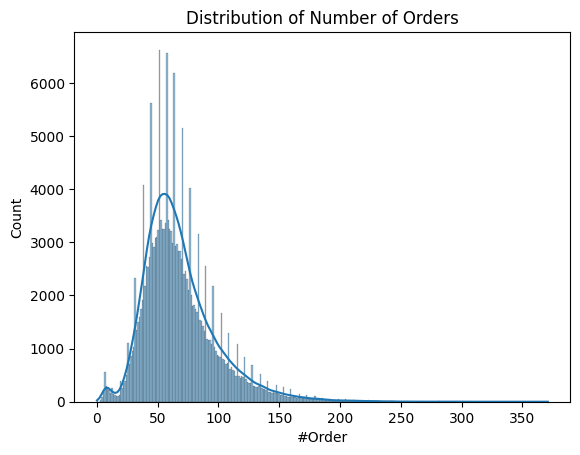

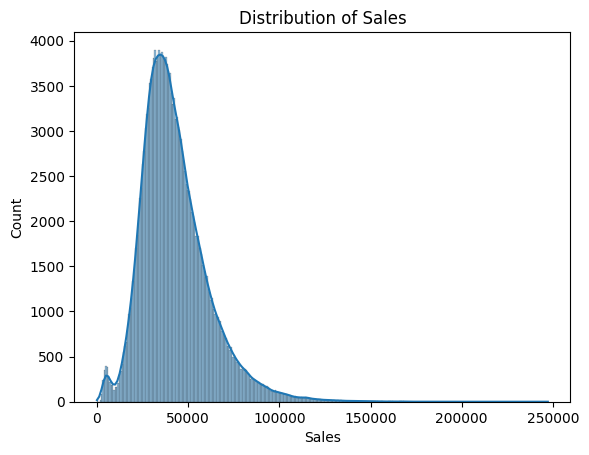

Shapiro-Wilk Test for Number of Orders: p-value=1.666744832152664e-119
Shapiro-Wilk Test for Sales: p-value=6.948606255821301e-114


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Plot histograms
sns.histplot(train_df1['#Order'], kde=True)
plt.title('Distribution of Number of Orders')
plt.show()

sns.histplot(train_df1['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Normality test
shapiro_orders = shapiro(train_df1['#Order'])
shapiro_sales = shapiro(train_df1['Sales'])
print(f"Shapiro-Wilk Test for Number of Orders: p-value={shapiro_orders[1]}")
print(f"Shapiro-Wilk Test for Sales: p-value={shapiro_sales[1]}")


In [ ]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation
pearson_corr, pearson_pval = pearsonr(train_df1['#Order'], train_df1['Sales'])

# Spearman correlation
spearman_corr, spearman_pval = spearmanr(train_df1['#Order'], train_df1['Sales'])

print(f"Pearson Correlation: {pearson_corr:.2f}, p-value: {pearson_pval}")
print(f"Spearman Correlation: {spearman_corr:.2f}, p-value: {spearman_pval}")


Pearson Correlation: 0.94, p-value: 0.0
Spearman Correlation: 0.94, p-value: 0.0


In [ ]:
from scipy.stats import pearsonr, spearmanr

order_normality = shapiro(train_df['#Order'])
sales_normality = shapiro(train_df['Sales'])

# Choose correlation type based on normality
if order_normality.pvalue > 0.05 and sales_normality.pvalue > 0.05:
    # Use Pearson correlation
    corr_coefficient, p_value = pearsonr(train_df['#Order'],train_df['Sales'])
    print("Pearson Correlation Coefficient:", corr_coefficient)
else:
    # Use Spearman correlation
    corr_coefficient, p_value = spearmanr(train_df['#Order'], train_df['Sales'])
    print("Spearman Correlation Coefficient:", corr_coefficient)

# Set significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant positive correlation between number of orders and sales.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between number of orders and sales.")


Spearman Correlation Coefficient: 0.9376797664379676
Reject the null hypothesis: There is a significant positive correlation between number of orders and sales.


By this we can assure that A higher number of orders correlates with higher sales.

**ML MODELLING**

Data Processing

●	Data Cleaning: Address missing values, remove duplicates, and correct inconsistencies in the dataset.


Step 1: Address Missing Values

In [ ]:
# Display columns with missing values and their counts
missing_values = train_df.isnull().sum()
print(missing_values)
print("Missing values in each column:\n", missing_values[missing_values > 0])


ID                  0
Store_id            0
Store_Type          0
Location_Type       0
Region_Code         0
Date                0
Holiday             0
#Order              0
Sales               0
Discount_No         0
Discount_Yes        0
Sales_Outlier       0
#Order_Outlier      0
Sales_Zscore        0
Sales_Outlier_Z     0
#Order_Zscore       0
#Order_Outlier_Z    0
dtype: int64
Missing values in each column:
 Series([], dtype: int64)


There are NO MISSING VALUES in the data

Step 2: Remove Duplicates

In [ ]:
# Check for duplicates
duplicates = train_df1.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


There are NO DUPLICATES in the data.

Step 3: Correct Inconsistencies

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                188340 non-null  object        
 1   Store_id          188340 non-null  int64         
 2   Store_Type        188340 non-null  object        
 3   Location_Type     188340 non-null  object        
 4   Region_Code       188340 non-null  object        
 5   Date              188340 non-null  datetime64[ns]
 6   Holiday           188340 non-null  int64         
 7   #Order            188340 non-null  float64       
 8   Sales             188340 non-null  float64       
 9   Discount_No       188340 non-null  bool          
 10  Discount_Yes      188340 non-null  bool          
 11  Sales_Outlier     188340 non-null  bool          
 12  #Order_Outlier    188340 non-null  bool          
 13  Sales_Zscore      188340 non-null  float64       
 14  Sale

In [ ]:
# Remove outliers using quantiles (optional)
Q1 = train_df['Sales'].quantile(0.25)
Q3 = train_df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = train_df[(train_df['Sales'] >= (Q1 - 1.5 * IQR)) & (train_df['Sales'] <= (Q3 + 1.5 * IQR))]
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,#Order,Sales,Discount_No,Discount_Yes,Sales_Outlier,#Order_Outlier,Sales_Zscore,Sales_Outlier_Z,#Order_Zscore,#Order_Outlier_Z
0,T1000001,1,S1,L3,R1,2018-01-01,1,9.0,7011.84,False,True,False,False,-1.938189,False,-1.943251,False
1,T1000002,253,S4,L2,R1,2018-01-01,1,60.0,51789.12,False,True,False,False,0.487889,False,-0.269328,False
2,T1000003,252,S3,L2,R1,2018-01-01,1,42.0,36868.20,False,True,False,False,-0.320542,False,-0.860124,False
3,T1000004,251,S2,L3,R1,2018-01-01,1,23.0,19715.16,False,True,False,False,-1.249910,False,-1.483743,False
4,T1000005,250,S2,L3,R4,2018-01-01,1,62.0,45614.52,False,True,False,False,0.153343,False,-0.203683,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,51.0,37272.00,False,True,False,False,-0.298663,False,-0.564726,False
188336,T1188337,153,S4,L2,R1,2019-05-31,1,90.0,54572.64,True,False,False,False,0.638702,False,0.715334,False
188337,T1188338,154,S1,L3,R2,2019-05-31,1,56.0,31624.56,True,False,False,False,-0.604647,False,-0.400616,False
188338,T1188339,155,S3,L1,R2,2019-05-31,1,70.0,49162.41,False,True,False,False,0.345571,False,0.058893,False


Now there are No OUTLIERS in the data.

●	Feature Engineering: Develop new features that could enhance the model's predictive power, such as time-based aggregates (e.g., sales in the last week), ratios, or interaction terms between features.

1. Time-Based Features

In [ ]:
train_df['Day'] = train_df['Date'].dt.day
train_df['Weekday'] = train_df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year


Lagged Sales Features:

In [ ]:
# Create lagged features for sales
df['Sales_Lag1'] = df['Sales'].shift(1)
df['Sales_Lag7'] = df['Sales'].shift(7)  # Sales 1 week prior
df['Sales_Lag30'] = df['Sales'].shift(30)  # Sales 1 month prior


Rolling Averages and Summaries:

In [ ]:
df['Sales_7d_avg'] = train_df['Sales'].rolling(window=7).mean()
df['Sales_30d_avg'] = train_df['Sales'].rolling(window=30).mean()
df['Sales_7d_sum'] = train_df['Sales'].rolling(window=7).sum()


Holiday and Weekend Flags:

In [ ]:
df['Is_Holiday'] = train_df['Holiday'].apply(lambda x: 1 if x else 0)
df['Is_Weekend'] = train_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                188340 non-null  object        
 1   Store_id          188340 non-null  int64         
 2   Store_Type        188340 non-null  object        
 3   Location_Type     188340 non-null  object        
 4   Region_Code       188340 non-null  object        
 5   Date              188340 non-null  datetime64[ns]
 6   Holiday           188340 non-null  int64         
 7   #Order            188340 non-null  float64       
 8   Sales             188340 non-null  float64       
 9   Discount_No       188340 non-null  bool          
 10  Discount_Yes      188340 non-null  bool          
 11  Sales_Outlier     188340 non-null  bool          
 12  #Order_Outlier    188340 non-null  bool          
 13  Sales_Zscore      188340 non-null  float64       
 14  Sale

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,#Order,Sales,Discount_No,...,#Order_Zscore,#Order_Outlier_Z,Sales_Lag1,Sales_Lag7,Sales_Lag30,Sales_7d_avg,Sales_30d_avg,Sales_7d_sum,Is_Holiday,Is_Weekend
0,T1000001,1,S1,L3,R1,2018-01-01,1,9.0,7011.84,False,...,-1.943251,False,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,60.0,51789.12,False,...,-0.269328,False,7011.84,NaN,NaN,NaN,NaN,NaN,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,42.0,36868.20,False,...,-0.860124,False,51789.12,NaN,NaN,NaN,NaN,NaN,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,23.0,19715.16,False,...,-1.483743,False,36868.20,NaN,NaN,NaN,NaN,NaN,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,62.0,45614.52,False,...,-0.203683,False,19715.16,NaN,NaN,NaN,NaN,NaN,1,0


**2.Ratios and Proportional Features**

Orders-to-Sales Ratio:

In [ ]:
df['Order_to_Sales_Ratio'] = df['Sales'] / (df['#Order'] + 1e-5)  # Prevent division by zero


Discount Impact Feature:

In [ ]:
#df['Has_Discount'] = df['Discount_No'].apply(lambda x: 1 if x != 'No Discount' else 0)
df['Discounted_Sales'] = df['Sales'] * df['Discount_Yes']
df['No_Discounted_Sales'] = df['Sales'] * df['Discount_No']

3. Interaction Terms

Store Type & Location Type Interaction:

In [ ]:
df['Store_Location_Type'] = df['Store_Type'] + '_' + df['Location_Type']


In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,#Order,Sales,Discount_No,...,Sales_Lag30,Sales_7d_avg,Sales_30d_avg,Sales_7d_sum,Is_Holiday,Is_Weekend,Order_to_Sales_Ratio,Discounted_Sales,No_Discounted_Sales,Store_Location_Type
0,T1000001,1,S1,L3,R1,2018-01-01,1,9.0,7011.84,False,...,NaN,NaN,NaN,NaN,1,0,779.092468,7011.84,0.0,S1_L3
1,T1000002,253,S4,L2,R1,2018-01-01,1,60.0,51789.12,False,...,NaN,NaN,NaN,NaN,1,0,863.151856,51789.12,0.0,S4_L2
2,T1000003,252,S3,L2,R1,2018-01-01,1,42.0,36868.20,False,...,NaN,NaN,NaN,NaN,1,0,877.814077,36868.20,0.0,S3_L2
3,T1000004,251,S2,L3,R1,2018-01-01,1,23.0,19715.16,False,...,NaN,NaN,NaN,NaN,1,0,857.180497,19715.16,0.0,S2_L3
4,T1000005,250,S2,L3,R4,2018-01-01,1,62.0,45614.52,False,...,NaN,NaN,NaN,NaN,1,0,735.717946,45614.52,0.0,S2_L3


Insights:

* The sales from Januvary to June are very good through out the year so we need to concentrate on remaining months with different discount in order to increase sales.

* Among 4 stores S1 is having highest sales i.e., is followed bu S4 ,S2 ,S3 So need to concentrate more on S2 and S3 to improve orders in this store.

* Totally we are having 4 locations among those L1 is having huge sales that means more orders for the products are also in L1 location only

* Where as in L4 and L5 are very low so need to think about these locations to improve the orders indirectly we can increase sales and also profit from the locations .

* All the Regions sales are ok but R4 is having low.

* Number of orders in R4 is very low so sales are also low here.

* The sales on non-holiday days i.e, working days are 164K , sales on holiday days are 25K.

* Discount in store S1 high , i think by this reason sales and orders  are also high. I think by this time people got adopted to buy products in this store.

* So now they can decrease Discount in S1 and increase discount in store S3 in order to attrack people to buy products in store S3 acording we can increase sales and orders .

* Similarlly they can implement in L4 and L5 , so that it can help the products to sale more and can gain profit in long run.

* Generally there is a huge drop of sales after May. So we need to try to know why this has been in happening.

* After Knowing reasons we can make changes accordingly in order to avoid product wastage and also increase profit and sales and increase discount according to store type, location and region.

* We should not only concentrate on Sales and profit. Where as concentrate on what products are being ordered more by people in different locations.

* And also provide Discount on orders According to seasonality like festival, vaction holidays etc, Inorder to attract people as well as childrens .

* So that we can make people adapted to store automatically we can increase sales and products will sell on time so no product will go out of stock when ever required as well as will not get wasted.

* These are some of the insights.

